## Importing necessary libraries and Data 

In [0]:
#import all necessary libraries
#libraries like numpy, pandas 
#extremely useful for data manipulations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Import the csv - comma seperated values file
here mushrooms data is the csv file lets import the file. 
this is the data we are going to work on

In [5]:
#read the data(csv file) from its location using pandas
df = pd.read_csv("mushrooms.csv")

pd.DataFrame(df.columns) #let us examine the features of the given data
#this analysis would be helpful for better understanding the data

,0
0,class
1,cap-shape
2,cap-surface
3,cap-color
4,bruises
5,odor
6,gill-attachment
7,gill-spacing
8,gill-size
9,gill-color


In [6]:
df.head(6) #lets have a look at the data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [7]:
df.dtypes #we need to find the data type of every column

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

So, our data is of Object type.
Let us look for the null values in the data

In [8]:
df.isnull().sum() #this isnull() helps us in finding the null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)] #another visual way for finding the null values

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [10]:
#class is the target column let us have a look
df['class'].unique()  
#unique() helps us in finding the unique values in a particular column

array(['p', 'e'], dtype=object)

So, our target is to predict whether the mushroom is 
e - edible or p - poisonous

In [11]:
df.shape #lets print the dimensions of the input data

(8124, 23)

Thus we have 22 features(one for label = 22+1=23) and 8214 observations or training examples

we can see that the dataset has values in strings. we need to convert them in unique integer values. thus we can perform required operation

Here I am applying labelEncoder for whole data for ease. Instead it should be fit_transformed on your train data and only transformed on the test data

## Encoding using LabelEncoder

In [12]:
#from sklearn import labelEncoder
#which helps in converting string data into unique integer value
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder() #lets invoke the function
for col in df.columns: #using a loop and iterate over every column
    df[col] = labelencoder.fit_transform(df[col]) #for data in every column transform into unique intergers

#once again let us check the data after encoding    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## Checking the encoded values 

In [13]:
#let us check unique values in a particular column
df["stalk-color-above-ring"].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [14]:
#let us use groupby() function to group the data according to groups present in the data
df.groupby("class").size()

class
0    4208
1    3916
dtype: int64

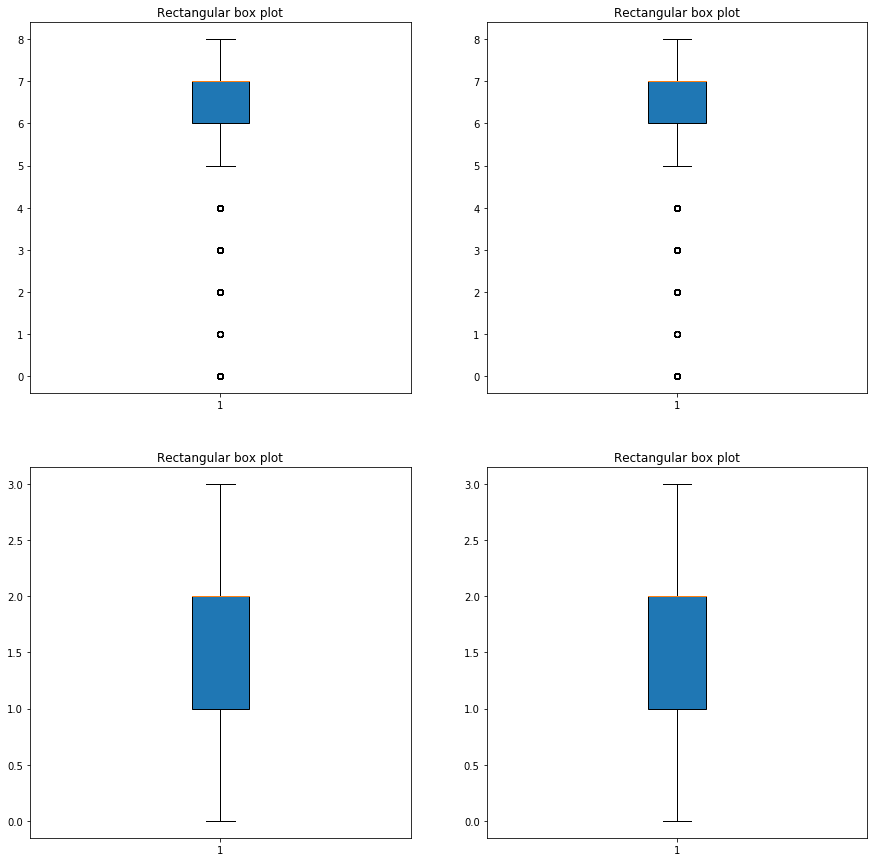

In [15]:
# Create a figure instance
fig, axes = plt.subplots(nrows=2 ,ncols=2 ,figsize=(15, 15))

# Create an axes instance and the boxplot
bp1 = axes[0,0].boxplot(df['stalk-color-above-ring'],patch_artist=True)
axes[0,0].set_title('Rectangular box plot')
bp2 = axes[0,1].boxplot(df['stalk-color-below-ring'],patch_artist=True)
axes[0,1].set_title('Rectangular box plot')
bp3 = axes[1,0].boxplot(df['stalk-surface-below-ring'],patch_artist=True)
axes[1,0].set_title('Rectangular box plot')
bp4 = axes[1,1].boxplot(df['stalk-surface-above-ring'],patch_artist=True)
axes[1,1].set_title('Rectangular box plot')

#boxplots and helpful in understanding distribution of the data
plt.show()

Text(0.5, 1.0, 'Class w.r.t stalk color above ring')

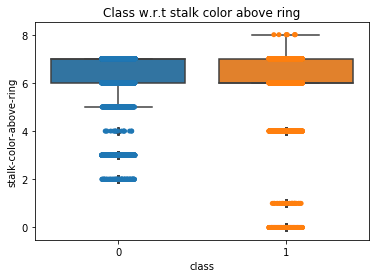

In [16]:
#plot blox plot to see the distributions
ax = sns.boxplot(x='class', y='stalk-color-above-ring',data=df);
#plotting stripplot on the same plot for analysis purpose
ax = sns.stripplot(x="class", y='stalk-color-above-ring',data=df, jitter=True,edgecolor="gray")
#set title of the plot
ax.set_title("Class w.r.t stalk color above ring",fontsize=12)

## Seperating Features And Labels

In [0]:
#all rows, all features with no labels
X = df.drop(["class"],axis = 1)

In [18]:
Y = df["class"] # Y is target feature i.e label
print(Y.shape) #it is a rank 1 matrix
Y = np.array(Y).reshape(-1,1) # reshape the Y to get rid of rank one matrices
print(Y.shape)

(8124,)
(8124, 1)


In [19]:
#let us check the sizes of the data
print(X.shape)
print(Y.shape)

(8124, 22)
(8124, 1)


In [20]:
#let us check the distribution of entire data of X
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [21]:
pd.DataFrame(Y).head(6)

,0
0,1
1,0
2,0
3,1
4,0
5,0


In [22]:
#check the correlation of the data
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


## Standardising the data

In [23]:
#Scale the data to be between small range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X) #print X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
5,1.029712,0.953270,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-1.313108,-0.295730
6,-2.087047,0.140128,1.373049,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.793947,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-1.313108,0.867149
7,-2.087047,0.953270,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-0.514389,0.867149
8,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.618426,-1.144806,1.781460,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,0.284330,-0.295730
9,-2.087047,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.793947,-1.144806,0.838989,0.683778,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,0.867149


Since the data set is very small we can avoid PCA

## Principal Component Analysis 

In [24]:
from sklearn.decomposition import PCA #import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.59211948e-17],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  4.35476041e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.93182410e-17],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  7.01453987e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -3.98483680e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  7.43806407e-20]])

In [25]:
#covariance 
covariance = pca.get_covariance()
covariance

array([[ 1.00012311e+00, -5.04598689e-02, -4.82087723e-02,
        -3.53784857e-02, -2.19379500e-02,  7.88747759e-02,
         1.31976727e-02,  5.40569473e-02, -6.03950664e-03,
         6.38020697e-02,  3.01947722e-02, -3.04209144e-02,
        -3.25951166e-02, -3.16631918e-02, -3.03935589e-02,
         2.65544707e-18,  7.25693997e-02, -1.06546915e-01,
        -2.54597238e-02, -7.34245762e-02,  6.34209571e-02,
        -4.22261061e-02],
       [-5.04598689e-02,  1.00012311e+00, -1.94041011e-02,
         7.02370673e-02,  4.52388718e-02, -3.41840973e-02,
        -2.82340541e-01,  2.08125459e-01, -1.61037318e-01,
        -1.41243642e-02, -1.26260048e-01,  8.91013054e-02,
         1.07977800e-01,  6.60584116e-02,  6.88933788e-02,
        -7.56051920e-18, -1.66054596e-02, -2.61503505e-02,
        -1.06420046e-01,  2.30392413e-01,  2.15577812e-02,
         1.63906824e-01],
       [-4.82087723e-02, -1.94041011e-02,  1.00012311e+00,
        -7.64543349e-04, -3.87168603e-01,  4.14406892e-02,
    

In [26]:
#The explained variance tells you how much information (variance) 
#can be attributed to each of the principal components
explained_variance = pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

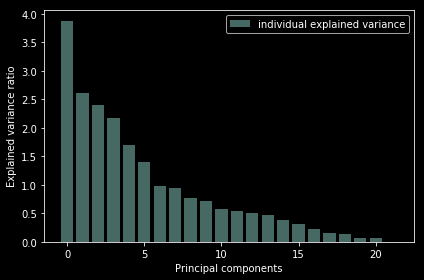

In [27]:
with plt.style.context('dark_background'): #set the back ground
    plt.figure(figsize=(6, 4))  #set the fugure
#plot explained_covarience to see which PCA components hold maximum information    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

We can see that the last 4 components has less amount od variance i.e information of the data. the first 17 components have almost 90% of the data

let us take only first two principal components and visualise it using K-means clustering

[[ 0.25315455 -0.32893654]
 [-1.95188293  4.74444545]
 [-1.67784445  2.41048651]
 ...
 [-1.88301333  0.45884613]
 [ 7.30488724 -1.27548472]
 [-4.86576994 -3.57533738]]


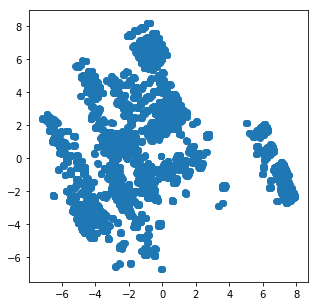

In [28]:
N = df.values #removes axes and returns only values of the dataframe
pca = PCA(n_components = 2)
x = pca.fit_transform(N)
print(x)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1]) #scatter plot of 1st column vs. 2nd column
plt.show()

[1 1 1 ... 1 0 1]


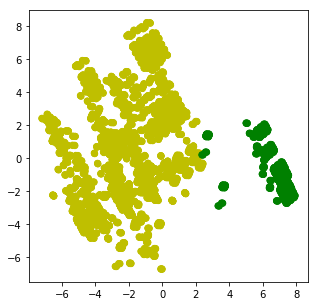

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2) #set a random seed if needed to reproduce the same results
#to set a randodm seed use "kmeans = KMeans(n_clusters = 2, random_state = 5)"
X_clustered = kmeans.fit_predict(N)
print(X_clustered)
LABEL_COLOR_MAP = {0 : 'g',1 : 'y'} #choose two color to represent
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

(8124, 17)


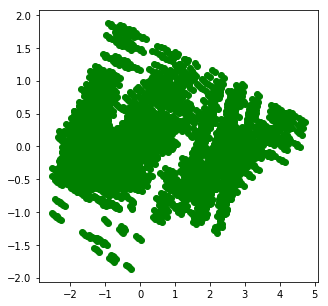

In [30]:
pca_modified=PCA(n_components=17)
X = pca_modified.fit_transform(X)
print(X.shape)
X
plt.figure(figsize = (5,5))
plt.scatter(X[:,1],X[:,16], c= "G") 
#change different indices of X to plot different components
plt.show()

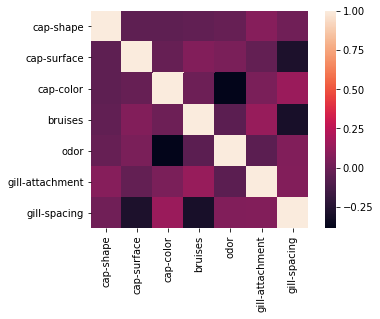

In [31]:
#finding the correlation between variables is a good way to analyse the data
Heatmp = df[['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing' ]] #Subsetting the data
cor = Heatmp.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

thus we can say cap-color is least correlated with odor.
and cap-shape is hghly correlated with gill-spacing

## Splitting the data into training and testing data 

In [0]:
#import sklearn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 17)
(1625, 17)
(6499, 1)
(1625, 1)


## Default Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#import logistic regression model from Sklearn
model_LR= LogisticRegression()

In [35]:
model_LR.fit(X_train,y_train) #train the model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_prob = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print(y_pred.shape) 

(1625,)


In [37]:
model_LR.score(X_test, y_test)

0.9507692307692308

In [38]:
#confusion matrix is a good way to tell whether a model is sensible or dumb
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[812,  33],
       [ 47, 733]])

thus our model is sensible, because diagonal components are high (true positives and true negatives are predicted with good accuracy

In [39]:
#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.95034516765286

In [40]:
#Compute Area Under the Curve (AUC) using the trapezoidal rule
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9768517675618268

Text(0.5, 0, 'False Positive Rate')

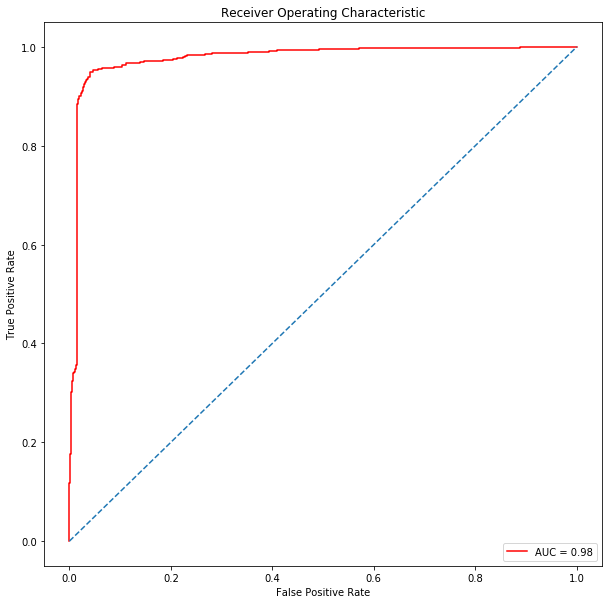

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Logistic regression tuned model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()
#tuned_parameters helps in grid search
#penality L1 and L2 are the regularization techniques explained below
tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,'penalty':['l1','l2']}

L1 and L2 are regularization parameters.They're used to avoid overfiting.Both L1 and L2 regularization prevents overfitting by shrinking (imposing a penalty) on the coefficients.

L1 is the first moment norm |x1-x2| (|w| for regularization case) that is simply the absolute dıstance between two points where L2 is second moment norm corresponding to Eucledian Distance that is |x1-x2|^2 (|w|^2 for regularization case)

Exhaustive search over specified parameter values for an estimator.
The GridSearchCV instance implements the usual estimator API: when “fitting” it on a dataset all the possible combinations of parameter values are evaluated and the best combination is retained.

In [0]:
from sklearn.model_selection import GridSearchCV
'''k=10: The value for k is fixed to 10
a value that has been found through experimentation 
to generally result in a model skill estimate with low bias a modest variance'''
LR= GridSearchCV(LR_model, tuned_parameters, cv=10)

In [44]:
LR.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:43

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print(LR.best_params_) #print the best parameters

{'C': 100, 'penalty': 'l1'}


In [46]:
y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR.score(X_test, y_test)

0.952

In [47]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[813,  32],
       [ 46, 734]])

The reported averages include macro average (averaging the unweighted mean per label), weighted average (averaging the support-weighted mean per label), sample average (only for multilabel classification) and micro average (averaging the total true positives, false negatives and false positives) it is only shown for multi-label or multi-class with a subset of classes because it is accuracy otherwise

In [48]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       845
           1       0.96      0.94      0.95       780

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [49]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.951577909270217

In [50]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9775360339857382

Text(0.5, 0, 'False Positive Rate')

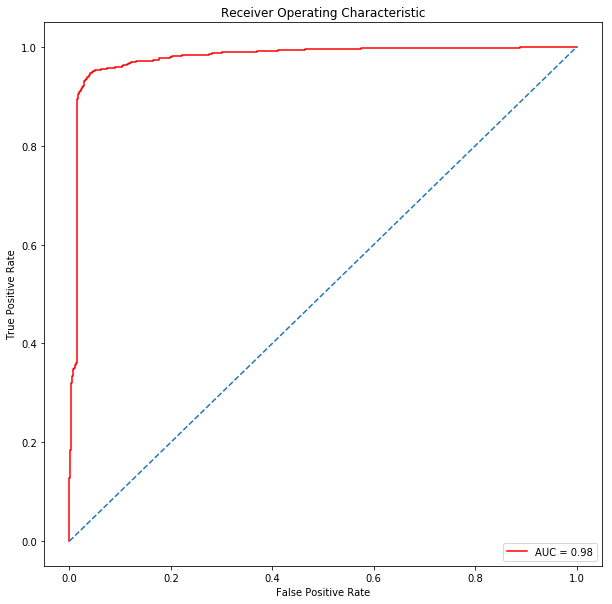

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Logistic regression with penality

In [52]:
LR_ridge= LogisticRegression(penalty='l1')
LR_ridge.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_prob = LR_ridge.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
LR_ridge.score(X_test, y_test)

0.9513846153846154

In [54]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[812,  33],
       [ 46, 734]])

In [55]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       845
           1       0.96      0.94      0.95       780

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [56]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9509861932938856

In [57]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9770292823547261

Text(0.5, 0, 'False Positive Rate')

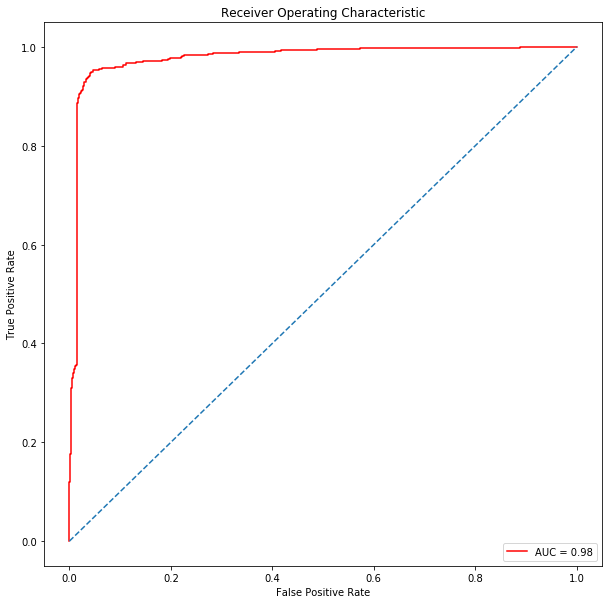

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Gaussian Naive Bayes 

In [59]:
#import from Sklearn
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
y_prob = model_naive.predict_proba(X_test)[:,1]
# This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0)
# This will threshold the probabilities to give class predictions.
model_naive.score(X_test, y_test)

0.9384615384615385

In [61]:
#reshape y_pred because to avoid rank 1 matrices
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_pred.reshape(-1,1)).sum()))
print(y_pred.reshape(-1,1).shape)
#reshape(-1,1) helps in reshaping in (1625,1) size
print(y_test.shape)

Number of mislabeled points from 1625 points : 100
(1625, 1)
(1625, 1)


In [62]:
scores = cross_val_score(model_naive, X_train, y_train.ravel(), cv=10, scoring='accuracy')
print(scores)

[0.91397849 0.91858679 0.93548387 0.93846154 0.92769231 0.92307692
 0.94453005 0.92604006 0.93682589 0.93836672]


In [63]:
scores.mean()

0.9303042636241106

In [64]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[810,  35],
       [ 65, 715]])

In [65]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       845
           1       0.95      0.92      0.93       780

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [66]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9376232741617356

In [67]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9625383098164163

Text(0.5, 0, 'False Positive Rate')

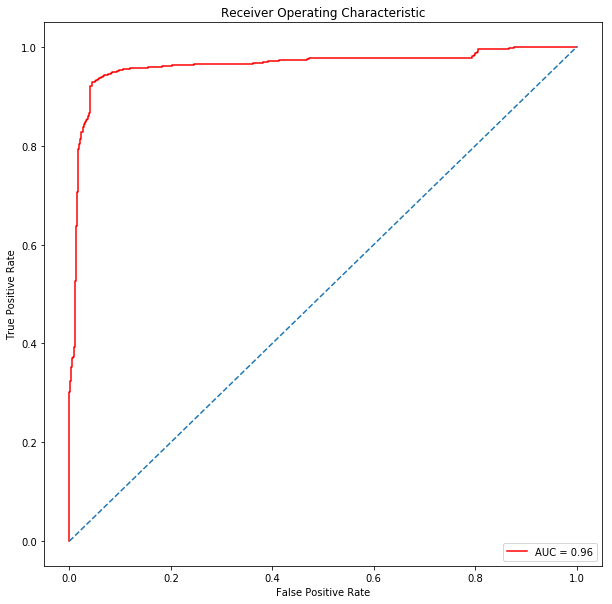

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Support Vector Machine 

In [0]:
from sklearn.svm import SVC
svm_model = SVC()

The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

## Support Vector Machine without polynomial kernel

In [0]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 #'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search: 1)A budget can be chosen independent of the number of parameters and possible values. 2)Adding parameters that do not influence the performance does not decrease efficiency

In [0]:
from sklearn.model_selection import RandomizedSearchCV
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [72]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

1.0


In [73]:
print(model_svm.cv_results_['mean_test_score'])
print(model_svm.cv_results_['std_test_score'])

[0.99569164 1.         0.98599785 0.94629943 0.94629943 1.
 0.99738421 0.93706724 0.94629943 1.         1.         1.
 0.98199723 0.88644407 1.         1.         0.94876135 1.
 1.         1.        ]
[0.00226038 0.         0.00374028 0.00582694 0.00582694 0.
 0.00169332 0.00922687 0.00582694 0.         0.         0.
 0.00668206 0.01173113 0.         0.         0.00628729 0.
 0.         0.        ]


In [74]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


In [75]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [76]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [77]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [78]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [79]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

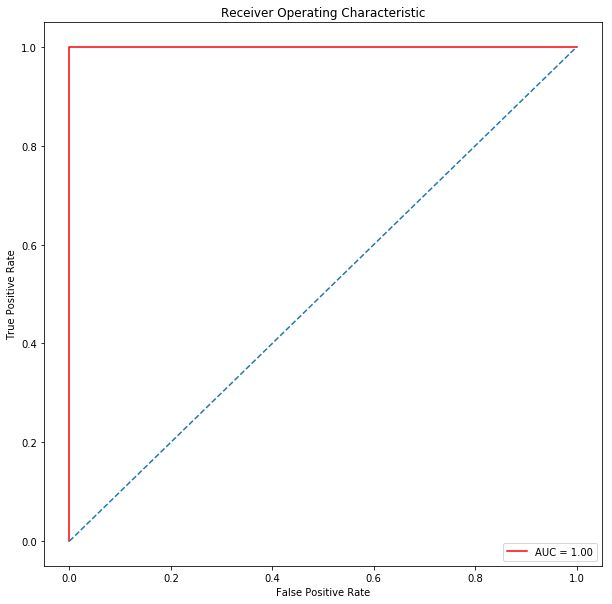

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Support Vector machine with polynomial Kernel

In [0]:
tuned_parameters = {
 'C': [1, 10, 100,500, 1000], 'kernel': ['linear','rbf'],
 'C': [1, 10, 100,500, 1000], 'gamma': [1,0.1,0.01,0.001, 0.0001], 'kernel': ['rbf'],
 'degree': [2,3,4,5,6] , 'C':[1,10,100,500,1000] , 'kernel':['poly']
    }

In [0]:
from sklearn.model_selection import RandomizedSearchCV

model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)
model_svm = RandomizedSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)

In [84]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

1.0


In [85]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

1.0


In [87]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [88]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [89]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [90]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

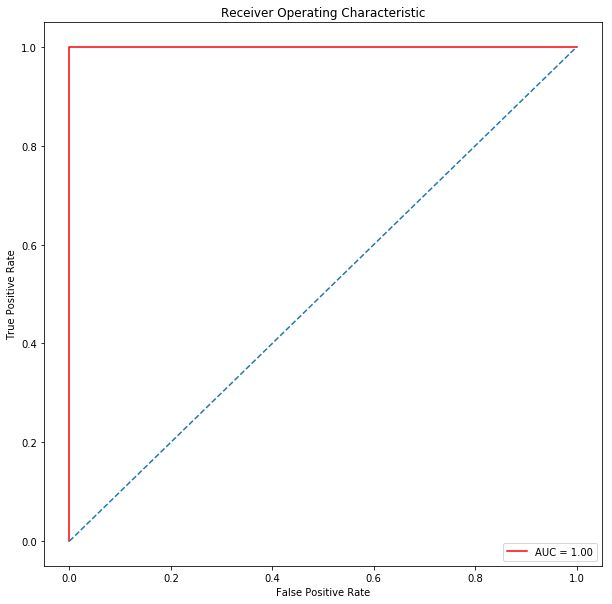

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

##  Trying default Model

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
model_RR=RandomForestClassifier()
#tuned_parameters = {'min_samples_leaf': range(5,10,5), 'n_estimators' : range(50,200,50),
                    #'max_depth': range(5,15,5), 'max_features':range(5,20,5)
                    #}

In [94]:
print(model_RR.fit(X_train,y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [95]:
y_prob = model_RR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
model_RR.score(X_test, y_pred)

1.0

In [96]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  2, 778]])

In [97]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [98]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9987179487179487

In [0]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

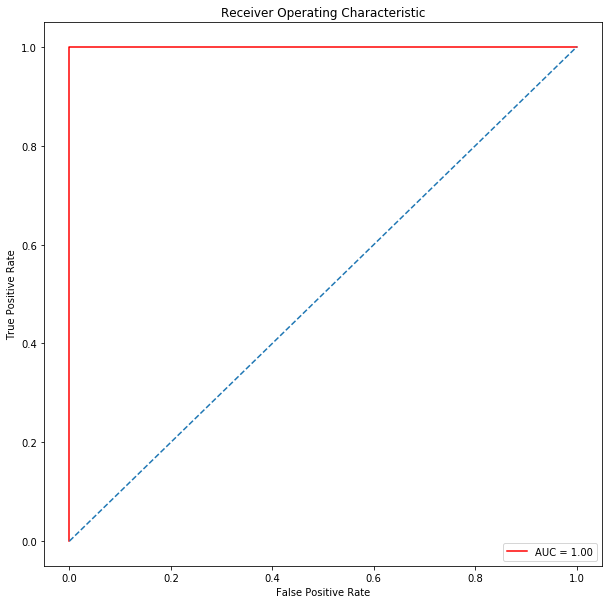

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Thus default Random forest model is giving us best accuracy.

Let us tuned the parameters of Random Forest just for the purpose of knowledge

There are 3 features which can be tuned to improve the performance of Random Forest

1) max_features 2) n_estimators 3) min_sample_leaf

A)max_features: These are the maximum number of features Random Forest is allowed to try in individual tree. 1)Auto : This will simply take all the features which make sense in every tree.Here we simply do not put any restrictions on the individual tree. 2)sqrt : This option will take square root of the total number of features in individual run. For instance, if the total number of variables are 100, we can only take 10 of them in individual tree. 3)log2:It is another option which takes log to the base 2 of the features input.

Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered.But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal max_features.

B) n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.

C)min_sample_leaf: Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Hence it is important to try different values to get good estimate

In [0]:
from sklearn.ensemble import RandomForestClassifier

model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']}

In [0]:
from sklearn.model_selection import RandomizedSearchCV

RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [103]:
RR_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [104]:
print(RR_model.best_score_)

0.9986151715648561


In [105]:
print(RR_model.best_params_)

{'n_estimators': 30, 'min_samples_leaf': 10, 'max_features': 'auto'}


In [106]:
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

1.0

In [107]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [108]:
auc_roc=metrics.classification_report(y_test,y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [109]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


1.0

Text(0.5, 0, 'False Positive Rate')

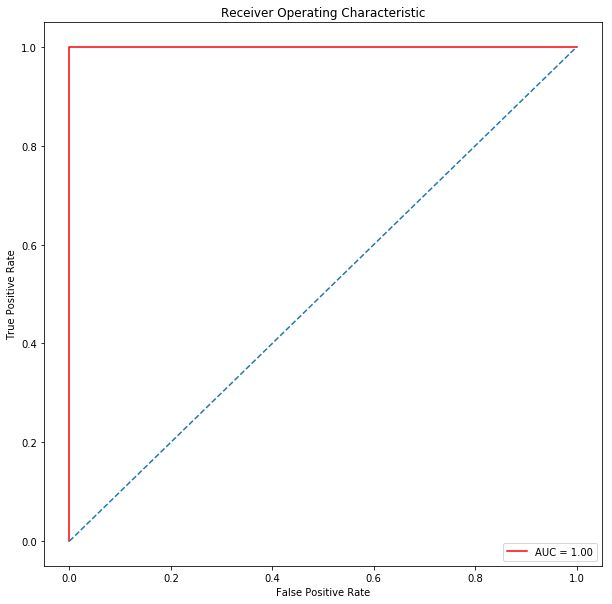

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Neural Network

Applying default Neural Network Model

In [0]:
from sklearn.neural_network import MLPClassifier

In [112]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [113]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [114]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [115]:
auc_roc=metrics.classification_report(y_test,y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [116]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

1.0

In [117]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

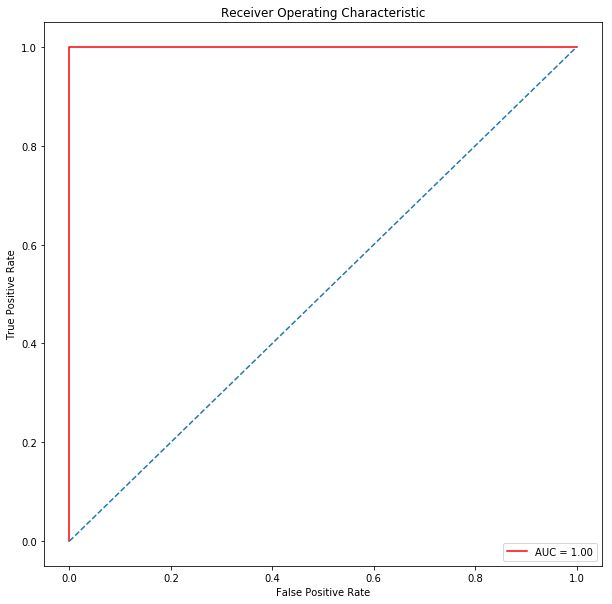

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Tuning the hyperparameters of the neural network
It is turning out to be computationally expensive for me with tuned model. Hence I am not running this. Also any suggestion to improvise it is welcome. :)


1) hidden_layer_sizes : Number of hidden layers in the network.(default is 100).Large number may overfit the data.


2)activation: Activation function for the hidden layer. A)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)). B)‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x). C)‘relu’, the rectified linear unit function, returns f(x) = max(0, x)


3)alpha: L2 penalty (regularization term) parameter.(default 0.0001)


4)max_iter: Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations.(default 200)

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

tuned_parameters={'hidden_layer_sizes': range(1,200,10) , 'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 'max_iter': range(50,200,50)
    
}

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
mlp.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [124]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]])